In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Load the Dataset
df = pd.read_csv("/content/sample_data/student_data.csv")

# Shape and data types
print("Dataset shape:", df.shape)
print("\nData types:\n", df.dtypes)

# Display the first 5 rows
df.head()

Dataset shape: (395, 33)

Data types:
 school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [2]:
# Check for missing values
missing = df.isnull().sum()
print("\nMissing Values:\n", missing[missing > 0])


Missing Values:
 Series([], dtype: int64)


In [3]:
# Summary of numerical columns
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


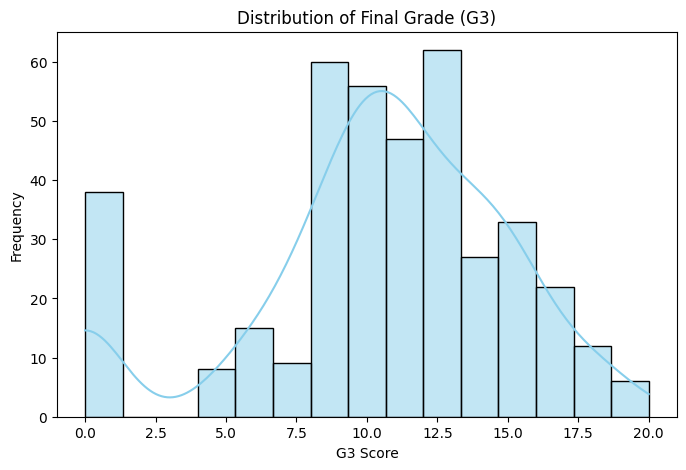

In [4]:
# Histogram and KDE for final grade (G3)
plt.figure(figsize=(8, 5))
sns.histplot(df['G3'], bins=15, kde=True, color='skyblue')
plt.title("Distribution of Final Grade (G3)")
plt.xlabel("G3 Score")
plt.ylabel("Frequency")
plt.show()

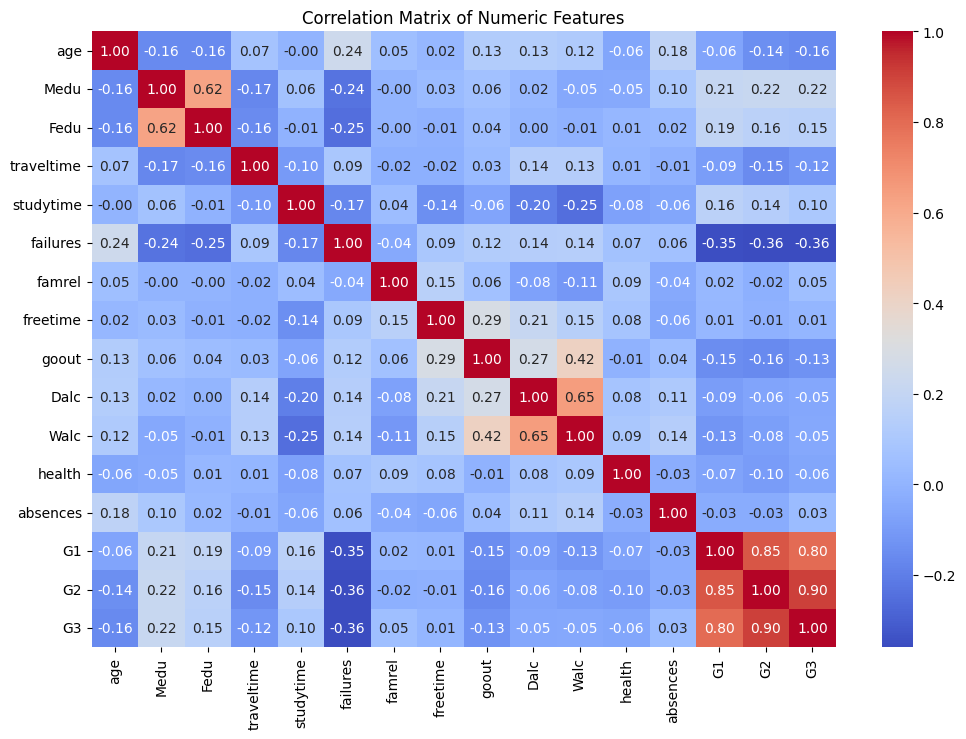

In [5]:
# Correlation matrix of numeric variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

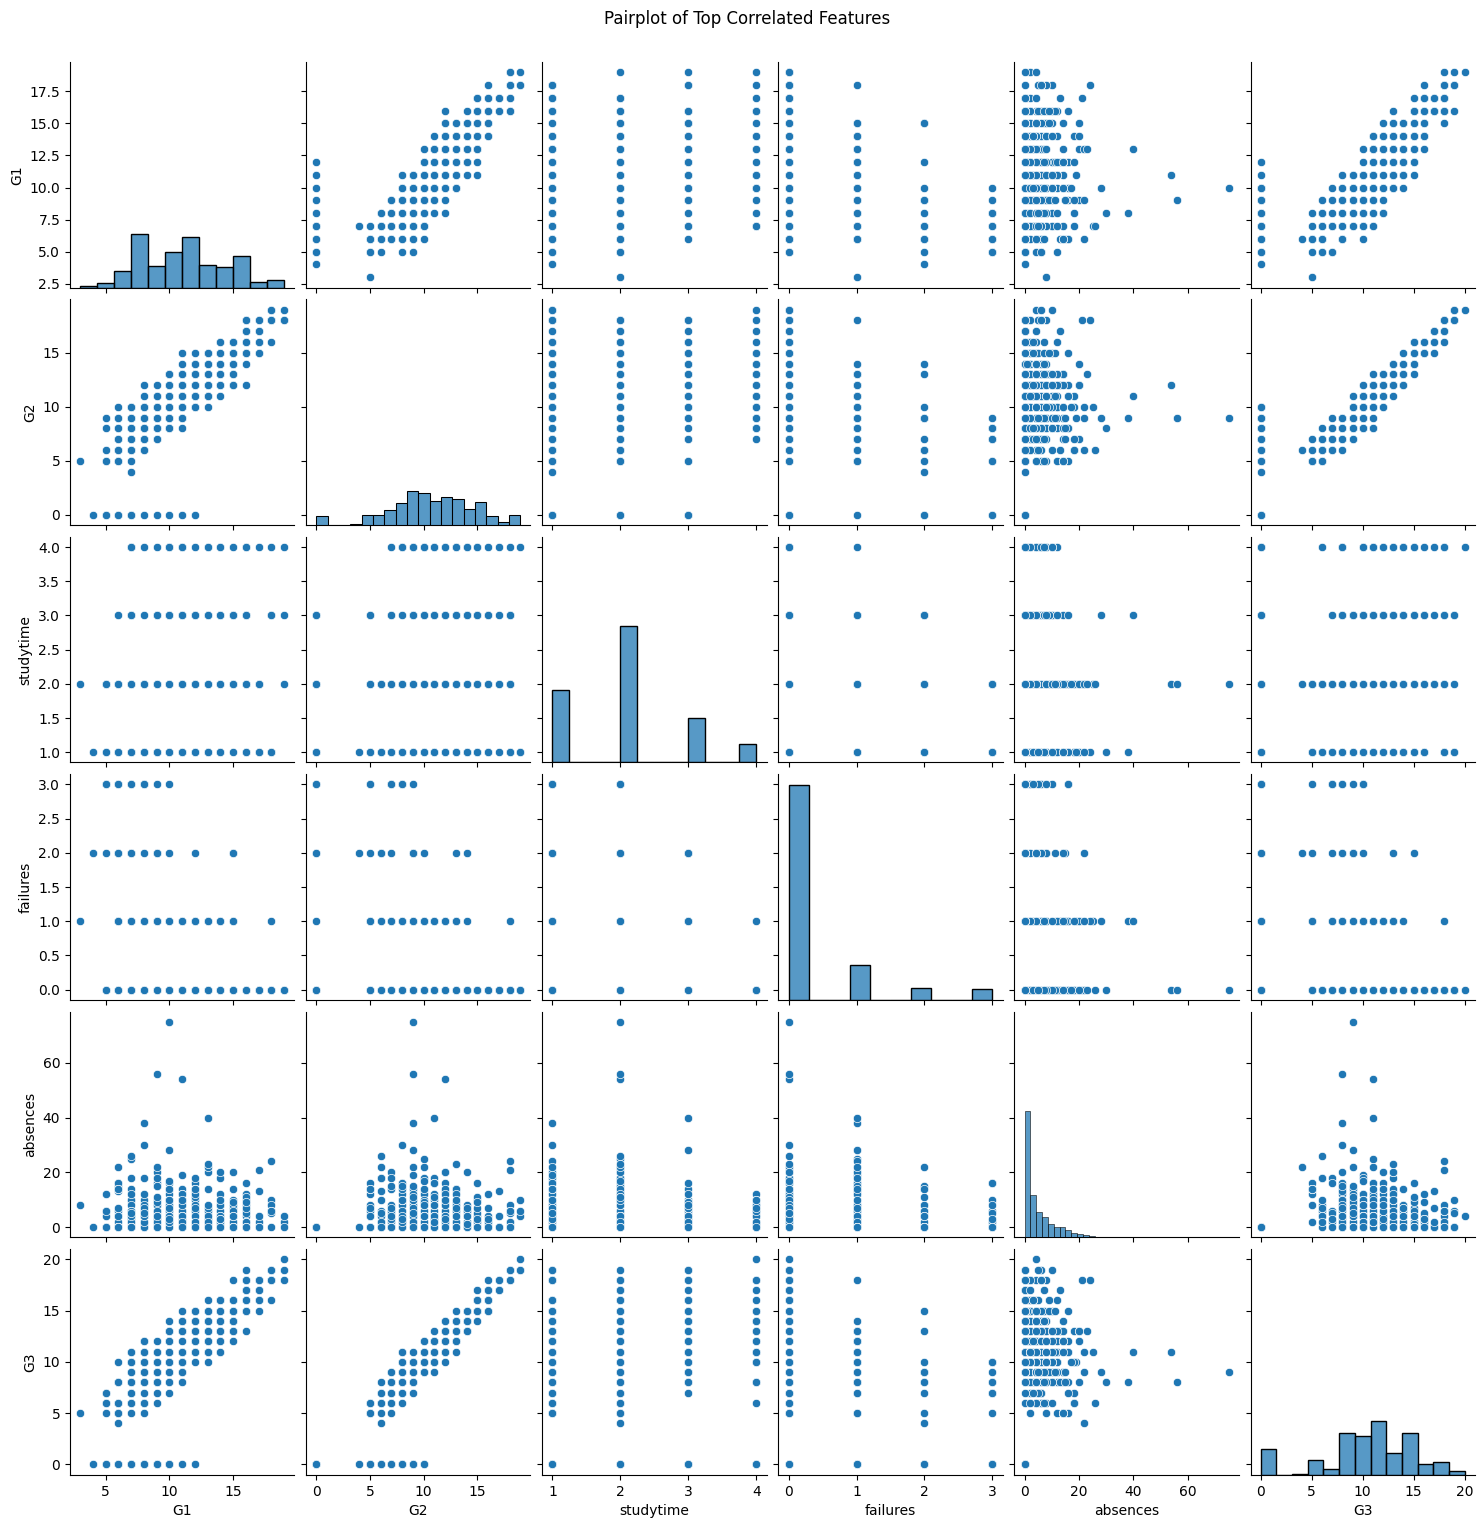

In [6]:
# Pairplot for top correlated features with G3
top_corr = df[['G1', 'G2', 'studytime', 'failures', 'absences', 'G3']]
sns.pairplot(top_corr)
plt.suptitle("Pairplot of Top Correlated Features", y=1.02)
plt.show()


In [7]:
# Target variable: G3 (final grade)
X = df.drop(['G3', 'G1', 'G2'], axis=1)
y = df['G3']

# Separate categorical and numeric columns
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['int64']).columns.tolist()

# Updated OneHotEncoder
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Build pipeline
lr_model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Train model
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluate
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

print("Linear Regression:")
print(f"R²: {r2_lr:.4f}, MSE: {mse_lr:.4f}, RMSE: {rmse_lr:.4f}")

Linear Regression:
R²: 0.1415, MSE: 17.6037, RMSE: 4.1957


In [9]:
ridge_model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", Ridge(alpha=1.0))
])

ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print("Ridge Regression:")
print(f"R²: {r2_ridge:.4f}, MSE: {mse_ridge:.4f}, RMSE: {rmse_ridge:.4f}")


Ridge Regression:
R²: 0.1437, MSE: 17.5576, RMSE: 4.1902


In [10]:
lasso_model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", Lasso(alpha=0.1))
])

lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

print("Lasso Regression:")
print(f"R²: {r2_lasso:.4f}, MSE: {mse_lasso:.4f}, RMSE: {rmse_lasso:.4f}")


Lasso Regression:
R²: 0.1306, MSE: 17.8274, RMSE: 4.2223


In [11]:
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1)
}

for name, model in models.items():
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
    print(f"{name} Regression CV R²: {scores.mean():.4f} (+/- {scores.std():.4f})")


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Linear Regression CV R²: 0.0015 (+/- 0.0958)
Ridge Regression CV R²: 0.0142 (+/- 0.0934)
Lasso Regression CV R²: 0.0641 (+/- 0.0663)


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


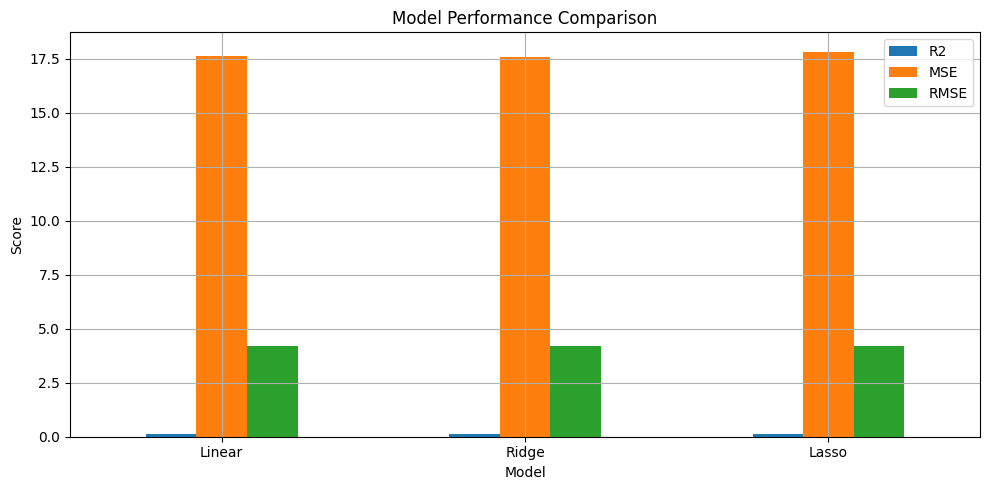

In [12]:
results = pd.DataFrame({
    'Model': ['Linear', 'Ridge', 'Lasso'],
    'R2': [r2_lr, r2_ridge, r2_lasso],
    'MSE': [mse_lr, mse_ridge, mse_lasso],
    'RMSE': [rmse_lr, rmse_ridge, rmse_lasso]
})

results.set_index('Model').plot(kind='bar', figsize=(10, 5), title="Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()
